In [1]:

import pandas as pd
import numpy as np
from IPython import display

# loads the raw_compensation data
!wget https://raw.githubusercontent.com/dnnyw/intro-to-ds-resources/main/labs/lab3/raw_compensation.csv

# download some helper functions in order to assist with plotting
!wget https://raw.githubusercontent.com/dnnyw/intro-to-ds-resources/main/functions.py
from functions import *

# download additional assets for this lab
from lab3 import *

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


# **Lab 3: Introductory Statistics, Functions, Visualizations, Standard Units**

In this week's lab you'll get a little bit more practice with python. You will apply the concepts you have learned in lecture to real world data, and learn how to use Python like a calculator to make calculation a whole lot faster. In addition, you will also learn how to code some basic functions, and apply those to data. 

If you have any questions or get stuck or anything, feel free to come to office hours. After completing the question, run the cell below to grade the question. The autograder will return True if your answer is correct and False otherwise.

**Today's lab**

1. Calculate some statistics on real-world data
2. Learn how to write some Python functions   
3. Plot some data and do some analysis
4. Work with standard units to quantify outliers

# 1. Introductory Statistics on CEO Incomes

In this question, you will get some practice with calculating mean, median, and standard deviation. We will be looking at the 2015 compensation of CEOs at the 100 largest companies in California. The data was compiled from a  [Los Angeles Times analysis](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the SEC from all publicly-traded companies. Two companies have two CEOs, so there are 102 CEOs in the dataset.

Run the following code block in order to load the data and read it into the variable `raw_compensation`. 

_Note: Units of pay are in **millions of dollars**._

In [2]:
raw_compensation = pd.read_csv('raw_compensation.csv', index_col = 0) 
raw_compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
Rank,,,,,,,,
1,Mark V. Hurd*,Oracle (Redwood City),53.25,(No previous year),0.95,52.27,0.02,362.00000
2,Safra A. Catz*,Oracle (Redwood City),53.24,(No previous year),0.95,52.27,0.02,362.00000
3,Robert A. Iger,Walt Disney (Burbank),44.91,-3%,24.89,17.28,2.74,477.00000
4,Marissa A. Mayer,Yahoo! (Sunnyvale),35.98,-15%,1.00,34.43,0.55,342.00000
5,Marc Benioff,salesforce.com (San Francisco),33.36,-16%,4.65,27.26,1.45,338.00000
...,...,...,...,...,...,...,...,...
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),0.94,-11%,0.93,0.00,0.02,17.00000
99,Jose L. Laparte,PriceSmart (San Diego),0.81,-7%,0.71,0.00,0.10,32.00000
100,Jack Dorsey,Twitter (San Francisco),0.07,(No previous year),0.00,0.00,0.07,0.63000


The `raw_compensation` is a `dataframe` object, which is basically just a suped up spreadsheet in Python. You can access the data in a specific column of the `dataframe` by using brackets with the variable. It is easier to show than explain. For example, if I wanted to obtain the array of values in the **Other Pay** column and assign it to a new variable, `ceo_other_pay`, I would do the following: 


In [3]:
ceo_other_pay = raw_compensation['Other Pay']

Remember, the name of the column is a string, so we must put it in quotes, otherwise Python will think we are putting a variable within the brackets.

## Question 1.a
Assign the variable `total_pay` to be the data in the "Total Pay" column. You should see Python output the data in that column once you run the cell.

In [4]:
# Your Code Here ...
total_pay = raw_compensation['Total Pay'] 
total_pay

Rank
1      53.25
2      53.24
3      44.91
4      35.98
5      33.36
       ...  
98      0.94
99      0.81
100     0.07
101     0.04
102     0.00
Name: Total Pay, Length: 102, dtype: float64

Calculate the average "Total Pay" and assign it to `mean_total_pay`. 

_Hint: Use built in Python functions such as_ `len` _and_ `sum`

In [5]:
## Your Code Here ...
mean_total_pay = sum(total_pay)/len(total_pay)
mean_total_pay

11.445294117647066

In [6]:
check('q1a', mean_total_pay)

True

## Question 1.b

Now that we've found the mean, let's work our way to calculating the standard deviation of the "Total Pay" column. Remember, Standard Deviation is calculated as: 

$$\text{(5) Root (4) Mean (3) Squared (2) Deviation from the (1) Average}$$

We've already calculated the average, now calculate each entry's deviation from the average, and assign it to `deviations_total_pay`. 

In [7]:
## Your Code Here ...
deviations_total_pay = total_pay - mean_total_pay
deviations_total_pay 

Rank
1      41.804706
2      41.794706
3      33.464706
4      24.534706
5      21.914706
         ...    
98    -10.505294
99    -10.635294
100   -11.375294
101   -11.405294
102   -11.445294
Name: Total Pay, Length: 102, dtype: float64

In [8]:
check('q1b', deviations_total_pay)

True

## Question 1.c

Next, we're going to square all of the deviations. Assign the result to `sqdev_total_pay`.

In [9]:
## Your Code Here ...
sqdev_total_pay = deviations_total_pay**2
sqdev_total_pay

Rank
1      1747.633434
2      1746.797440
3      1119.886540
4       601.951793
5       480.254334
          ...     
98      110.361204
99      113.109481
100     129.397316
101     130.080734
102     130.994757
Name: Total Pay, Length: 102, dtype: float64

In [10]:
check('q1c', sqdev_total_pay)

True

## Question 1.d

Last but not least, finish computing the standard deviation of the "Total Pay" column, and assign the result to `std_total_pay`. For reference, this is the definition of Standard Deviation:


$$\text{(5) Root (4) Mean (3) Squared (2) Deviation from the (1) Average}$$



In [11]:
## Your Code Here ...

std_total_pay = np.sqrt(np.mean(sqdev_total_pay))
std_total_pay

9.246837584042

In [12]:
check('q1d', std_total_pay)

True

You might be wondering, "This is so repetitive, do I have to do this process everytime I want to compute a standard deviation?". The answer of course, is **No!**. 

Python can be used like a calculator, but it is so much more as you can write code to do all of this for you in just one step! In the next part you're going to learn a little about how we can write functions, and then you're going to write a function to compute the mean and a function to compute the standard deviation! 

# 2. Functions

Before we write functions to compute the mean, let's just work on making a function that converts a proportion to a percentage by multiplying it by 100. For example, the value of `to_percentage(.5)` should be the number 50, as in 50 percent. 

A function has a few parts: 

#### a) **_`def`_**

It always starts with `def` (short for **def**ine):

    def


##### b) _**Name**_
Next comes the name of the function.  Like other names we've defined, it can't start with a number or contain spaces. Let's call our function `to_percentage`:
    
    def to_percentage

##### c) _**Signature**_
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  A function can have any number of arguments (including 0!). 

`to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)
    
If we want our function to take more than one argument, we add a comma between each argument name.

We put a colon after the signature to tell Python it's over. If you're getting a syntax error after defining a function, check to make sure you remembered the colon!

    def to_percentage(proportion):

##### d) _**Documentation**_
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing an **indented** triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""

  
##### e) _**Body**_
Now we start writing code that runs when the function is called.  This is called the *body* of the function and every line **must be indented with a tab**.  Any lines that are *not* indented and left-aligned with the def statement is considered outside the function. 

Some notes about the body of the function:
- We can write any code that we would write anywhere else.  
- We use the arguments defined in the function signature. We can do this because we assume that when we call the function, values are already assigned to those arguments.
- We generally avoid referencing variables defined *outside* the function.


Now, let's give a name to the number we multiply a proportion by to get a percentage:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### f) _**`return`**_
The special instruction `return` is part of the function's body and tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor
        
`return` only makes sense in the context of a function, and **can never be used outside of a function**. `return` is always the last line of the function because Python stops executing the body of a function once it hits a `return` statement.

*Note:*  `return` inside a function tells Python what value the function evaluates to. However, there are other functions, like `print`, that have no `return` value. For example, `print` simply prints a certain value out to the console. 

`return` and `print` are **very** different. 

## Question 2.a 

Define `to_percentage` in the cell below.  Call your function to convert the proportion .2 to a percentage.  Name that percentage `twenty_percent`.

In [13]:
# Your Code Here...

def to_percentage(proportion):
    """Converts a proportion to a percentage."""
    factor = 100
    return proportion * factor

twenty_percent = to_percentage(.2)
twenty_percent


20.0

In [14]:
check('q2a', to_percentage)

True

## Question 2.b

You can use also use named values as arguments to your function. Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Like other named values, functions stick around after you define them.

In [15]:
a_proportion = 2**(.5) / 2
a_percentage = to_percentage(a_proportion) 
a_percentage

70.71067811865476

In [16]:
check('q2b', a_percentage)

True

Here's something important about functions: the names assigned *within* a function body are only accessible within the function body. Once the function has returned, those names are gone.  So even though you defined `factor = 100` inside  the body of the `to_percentage` function up above and then called `to_percentage`, you cannot refer to `factor` anywhere except inside the body of `to_percentage`:

In [17]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.)
factor


NameError: name 'factor' is not defined

Functions don't only have to work with numbers! You can do practically anything with them, as long as you know what functions to use and how to code it! 

## Question 2.c

Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".)

*Hint:* To remove all the "a"s from a string, you can use `<that_string>.replace("a", "")`.  The `.replace` method for strings returns a new string, so you can call `replace` multiple times, one after the other. 

In [18]:
def disemvowel(a_string):
    """Takes a string and removes all the vowels in the string"""
    ## Your Code Here ...
    return a_string.replace('a','').replace('e','').replace('i','').replace('o','').replace('u','')


# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'Cn y rd ths wtht vwls?'

In [19]:
check('q2c', disemvowel)

True

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake telling you to follow another recipe to make the frosting, and another to make the jam filling.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, if I wanted to count the number of characters *that aren't vowels* in a piece of text, one way to do that is this to remove all the vowels and count the size of the remaining string. The code would be as follows:


In [20]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    without_vowels = disemvowel(a_string)
    return len(without_vowels)



Notice in the above function, I used _two_ other functions inside of the function, one inside of the body, and one inside of the return.

With this knowledge, let's go back to our main task: speeding up calculating the mean and the standard deviation. 

## Question 2.d

Implement the `average` function which takes in an array/list of numbers and returns the average of the values in that list.

_Hint: You've already written some of the code above! It's just a matter of generalizing it to any input and putting it into a function!_

In [21]:
def average(some_numbers):
    """Returns the average of a set of numbers"""
    
    return np.mean(some_numbers)



In [22]:
check('q2d', average)

True

## Question 2.e

Remember how we mentioned that you can call functions inside of other functions? Now try to define a function that will handle calculating the standard deviation of a list of numbers, while also using your average function from above! 

_Hint: You've already written some of the code above! It's just a matter of generalizing it to any input and putting it into a function!_

In [23]:
def standard_deviation(some_numbers):
    """Returns the standard deviation of a set of numbers"""
    ## Your Code Here ...
    ...
    return np.std(total_pay)

# Now call your function on `total_pay` and see if you get the same answer as when you went through all the steps! 
standard_deviation(total_pay)


9.246837584042

In [24]:
check('q2e', standard_deviation)

True

Congratulations on writing some of your first Python functions! 

# 3. Visualizations

Now we're gonna make some visualizations and conduct some statistical analysis on the CEO salary data. Refer back to your Python cheatsheet for the documentation on some of these functions. We will be using `plot_histogram` and `plot_scatter`.

## Question 3.a

Outside of "Total Pay", we also have the breakdown of each CEO's pay into "Cash Pay", "Equity Pay", and "Other Pay". Access the "Equity Pay" data from the `raw_compensation` data and make a histogram plot of the CEOs' "Equity Pay". 

Remember, a good visualization will always have labelled axis as well as a title explaining what the visualization is showing. For a histogram, typically your y-axis will be labelled "counts". We've plotted a histogram for "Total Pay" for you below. 

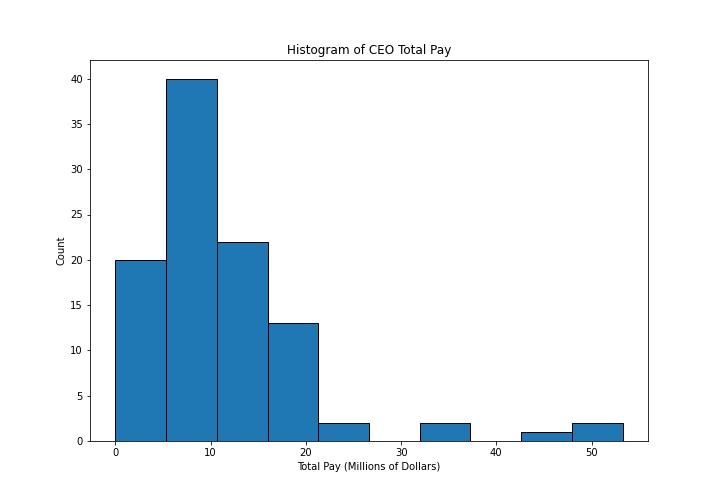

In [25]:
display.Image("https://raw.githubusercontent.com/dnnyw/intro-to-ds-resources/main/labs/lab3/TotalPayHistogram.jpg")

### Question 3.a.1 

Plot a labelled histogram for the "Equity Pay" variable

(<Figure size 576x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Histogram of CEO Equity Pay'}, xlabel='Equity Pay', ylabel='Counts'>)

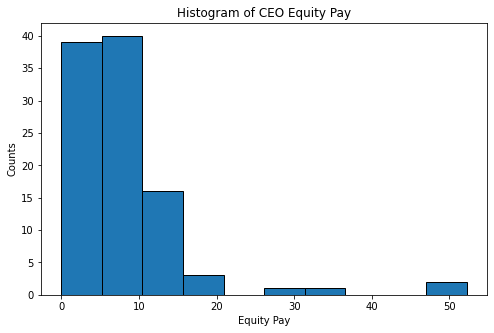

In [26]:
# Your Code Here
equity_pay = raw_compensation["Equity Pay"]
plot_histogram(equity_pay, x_label = "Equity Pay", y_label = "Counts", title = "Histogram of CEO Equity Pay")


### Question 3.a.2

Looking at the histogram you created, what proportion of CEOs made more than $25 million of their compensation in Equity? Assign your answer to the `equity_pay_ceo` variable


In [27]:
## Your Answer Here ...

equity_pay_ceo = 4/len(equity_pay)
equity_pay_ceo

0.0392156862745098

In [28]:
check("q3a2", equity_pay_ceo)

True

Histograms are really good at visualizing the distribution of one variable. You get a good idea of what the range of the variable is, where a majority of the data lies, and can observe outliers quite well too. Now, let's move to scatter plots, where we are much better equipped at seeing how two variables are related. 


## Question 3.b

Use the `plot_scatter` function to make a labelled scatter plot comparing CEOs' equity pay to their cash pay. Plot "Cash Pay" on the x-axis and "Equity Pay" on the y-axis

(<Figure size 576x360 with 1 Axes>, <AxesSubplot:>)

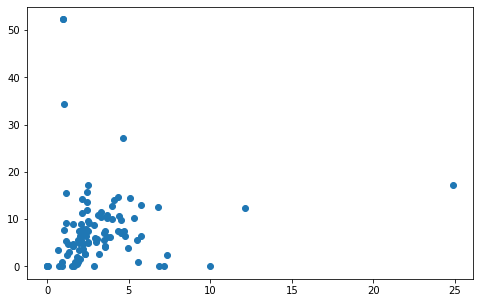

In [29]:
## Your Code Here...
cash_pay = raw_compensation["Cash Pay"]
plot_scatter(cash_pay, equity_pay)

It's important to notice the relative scales of the x and y axes. There are clearly some outliers in the data - certain CEOs have much larger forms of compensations compared to the rest of their cohort. 

However, working with equity compensation and cash compensation and making comparisons between the two is difficult since we might not be familiar with CEO compensation. Maybe it's always the case that equity is much larger than cash or vice versa. Let's make use to standard units to try and understand just how far out are these outlier CEOs that have crazy high levels of compensation.

# 4. Working in Standard Units

Recall that converting data to Standard Units or _z_ can be calculated with the following formula:

$$ z = \frac{\text{Value} - \text{Average}}{\text{Standard Deviation}}$$


## Question 4.a 

Write a function called `convert_to_SU` which should take a list of numbers and convert them their values in Standard Units. 

_Hint: Remember to use functions that you defined previously!_

In [30]:
def convert_to_SU(list_of_numbers):
    """Returns the inputted list of numbers but standardized to be in Standard Units"""
    ... # Your Code Here ...
    standardized_list = (list_of_numbers - np.mean(list_of_numbers) )/ np.std(list_of_numbers)
    return standardized_list


In [31]:
check("q4a", convert_to_SU)

True

# Question 4.b

Use your `convert_to_SU` function to convert "Equity Pay" and "Cash Pay" into standard units, and plot them on a labelled scatter plot. 

In [32]:
# Your Code Here ...
converted_equity = ...
converted_cash = ...

plot_scatter(...)

TypeError: plot_scatter() missing 1 required positional argument: 'y_data'

Whereas before, we could see the outliers in our scatter plot, we didn't know _how much_ of an outlier they were compared to the rest of the data. 


As you can see, a majority of the data lies below 2 standard deviations. However, we see that the outlier with lots of cash compensation over 6 standard deviations away from the mean cash compensation, where as the outlier with lots of equity is just over 5 standard deviations. Since we have "normalized" cash and equity compensation, we can tell that the CEO who makes a lot of cash is much more of an outlier than the CEO with equity. 

Also note that besides the scale on the _x_ and _y_ axis, the shape and location of the data hasn't changed at all. That's because all we are doing is shifting the units on the axis to better understand the data.

# 5. Summary 


Yay! You're done with lab 03.  Hope this lab was helpful for some extra practice. If you have any questions or want to go further in depth on the material, please attend office hours which is held after lectures until 8PM. 

If you are submitting this lab for the Certificate of Completion, save this file which can be found under `File`.  Then run the cell below ONLY when you completed every question. Everything should return `True` which would indiciate everything is correct.


In [33]:
checkall()

{'q1a': True, 'q1b': True, 'q1c': True, 'q1d': True, 'q2a': True, 'q2b': True, 'q2c': True, 'q2d': True, 'q2e': True, 'q3a2': True, 'q4a': True}
